# 1

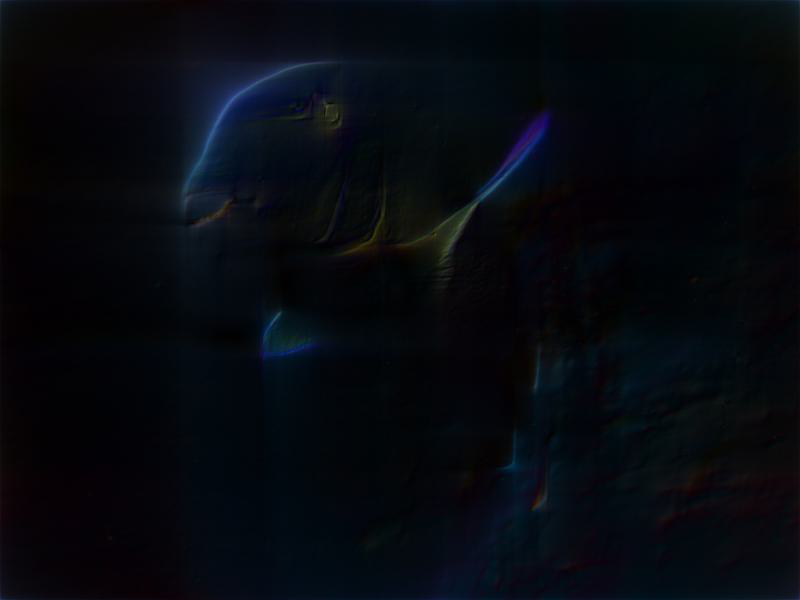

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("im1.jpg").convert("RGB")
pixels = np.array(im)

fft_channels = []
for channel in range(3):
    fft = np.fft.fft2(pixels[:, :, channel])
    fft_shifted = np.fft.fftshift(fft)
    fft_channels.append(fft_shifted)

magnitude = np.log(np.abs(fft_channels[0]))
plt.imsave("out.jpg", magnitude, cmap='gray')

rows, cols = pixels.shape[:2]
for channel in range(3):
    fft_channels[channel][rows//2:, :] = 0
    fft_channels[channel][:, cols//2:] = 0


reconstructed = np.zeros_like(pixels, dtype=np.uint8)
for channel in range(3):
    ifft_shifted = np.fft.ifftshift(fft_channels[channel])
    reconstructed[:, :, channel] = np.abs(np.fft.ifft2(ifft_shifted))


Image.fromarray(reconstructed).save("out2.jpg")
im_out = Image.open("out2.jpg").convert("RGB")
im_out

# 2

In [19]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fft import fft, ifft

rate, data = wav.read("in10.wav")
if data.ndim > 1: 
    data = data.mean(axis=1)

fft_signal = fft(data)

noise_freq = np.random.normal(0, 500000, len(fft_signal)//1) 
fft_signal[:len(noise_freq)] += noise_freq
wav.write("out1.wav", rate, np.real(ifft(fft_signal)).astype(np.int16))

fft_signal[:2000] = 0
wav.write("out2.wav", rate, np.real(ifft(fft_signal)).astype(np.int16))